# **Model Notebook for _CHILD DETECTOR_**

In [2]:
    ## Import Libraries

    import pandas as pd

    import tensorflow as tf

    import numpy as np

    import seaborn as sns
    import cv2
    from matplotlib import pyplot as plt

    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Flatten
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.layers import Dense,MaxPooling2D,MaxPool2D,Conv2D
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input,Activation,Add
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
    from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import datasets, layers, models
    from tensorflow.keras import utils

    import scipy
    from scipy import stats
    from scipy.stats import norm

    from pathlib import Path
    import os.path

    import itertools

    import skimage

    import random

#### **Load Data**

In [3]:
base_dir="C:\\Users\\Abhinay\\OneDrive\\Desktop\\Child_Detector"
os.chdir(base_dir)

In [4]:
train_path="C:\\Users\\Abhinay\\OneDrive\\Desktop\\Child_Detector\\train\\"
test_path= "C:\\Users\\Abhinay\\OneDrive\\Desktop\\Child_Detector\\test\\"

In [5]:
os.listdir(train_path)

['adults', 'children']

In [6]:
os.listdir(test_path)

['adults', 'children']

In [7]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 2
train_len = 680

# Create a dictionary to map folder names to labels
label_map = {'children': 1, 'adults': 0}

def load_image(file_path):
    img = cv2.imread(file_path)
    if img is None:
        return None
    img = skimage.transform.resize(img, (imageSize, imageSize, 3))
    return img

def get_data(folder, label_map):
    X = []
    y = []
    
    for folderName in os.listdir(folder):
        if folderName not in label_map:
            continue  # Skip folders that are not in the mapping
        label = label_map[folderName]
        
        folder_path = os.path.join(folder, folderName)
        
        for image_filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_filename)
            img = load_image(image_path)
            
            if img is not None:
                X.append(img)
                y.append(label)
    
    return np.array(X), np.array(y)

X_train, y_train = get_data(train_path, label_map)
print("Images successfully imported...")

Images successfully imported...


In [8]:
## Defining Child and Adult Path

train_child_path=train_path+'children\\'
train_adult_path=train_path+'adults\\'

In [9]:
print("Displaying content of Children Folder")

os.listdir(train_child_path)

Displaying content of Children Folder


['100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '177.jpg',
 '178.jpg',
 '179.jpg',
 '180.jpg',
 '181.jpg',
 '182.jpg',
 '18

In [10]:
print("Displaying content of Adults Folder")

os.listdir(train_adult_path)

Displaying content of Adults Folder


['100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 '176.jpg',
 '177.jpg',
 '178.jpg',
 '179.jpg',
 '180.jpg',
 '181.jpg',
 '182.jpg',
 '18

In [11]:
from skimage.io import imread

In [12]:
## Access an image from Children

print("Accessing an image of Child")
os.listdir(train_child_path)[10]

Accessing an image of Child


'110.jpg'

In [13]:
'''Displaying a Child Image'''

child=train_child_path+'110.jpg'
imread(child).shape

(320, 370, 3)

Displaying Image


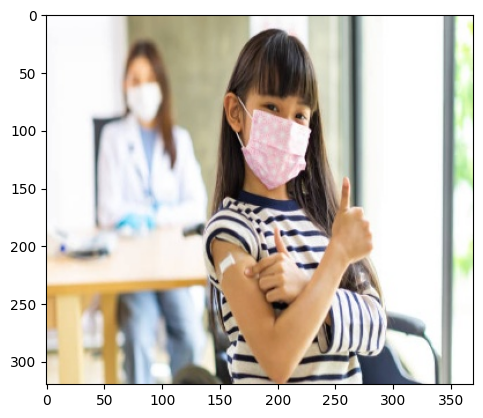

In [14]:
print("Displaying Image")
plt.imshow(imread(child))

In [15]:
## Access an Adult Image
 
print("Accessing an image of an Adult")
os.listdir(train_adult_path)[16]

Accessing an image of an Adult


'116.jpg'

In [16]:
'''Displaying an Adult Image'''

adult=train_adult_path+'116.jpg'
imread(adult).shape

(320, 370, 3)

Displaying Image


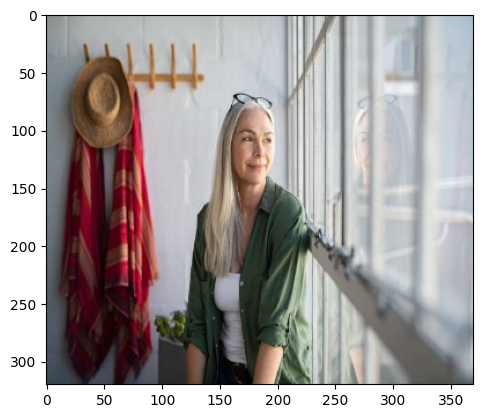

In [17]:
print("Displaying Image")
plt.imshow(imread(adult))

In [18]:
print("No.of Train Child Images")
len(os.listdir(train_child_path))

No.of Train Child Images


340

In [19]:
print("No.of Train adult Images")
len(os.listdir(train_adult_path))

No.of Train adult Images


340

In [20]:
print("No.of Test children Images")
len(os.listdir(test_path+'children'))

No.of Test children Images


60

In [21]:
print("No.of Test adult Images")
len(os.listdir(test_path+'adults'))

No.of Test adult Images


60

In [22]:
## Converting images and assigned labels into a Dataframe 

train_folder = train_path
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df = pd.DataFrame(all_data)
df

,Path,Label
0,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
1,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
2,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
3,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
4,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
...,...,...
675,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
676,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
677,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
678,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children


In [23]:
## Converting images and assigned labels into a Dataframe 

test_folder = test_path
all_data = []
for folder in os.listdir(test_folder):
    
    label_folder = os.path.join(test_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df1= pd.DataFrame(all_data)
df1

,Path,Label
0,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
1,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
2,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
3,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
4,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,adults
...,...,...
115,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
116,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
117,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children
118,C:\Users\Abhinay\OneDrive\Desktop\Child_Detect...,children


#### **Visualization**

In [24]:
classes = ['children', 'adults']

<Figure size 640x480 with 0 Axes>

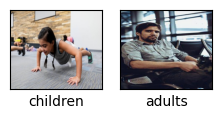

In [25]:
## Display sample images

def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(14,10))

    for i in range (0,2):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_path + "{0}\\100.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_32212\676214985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")


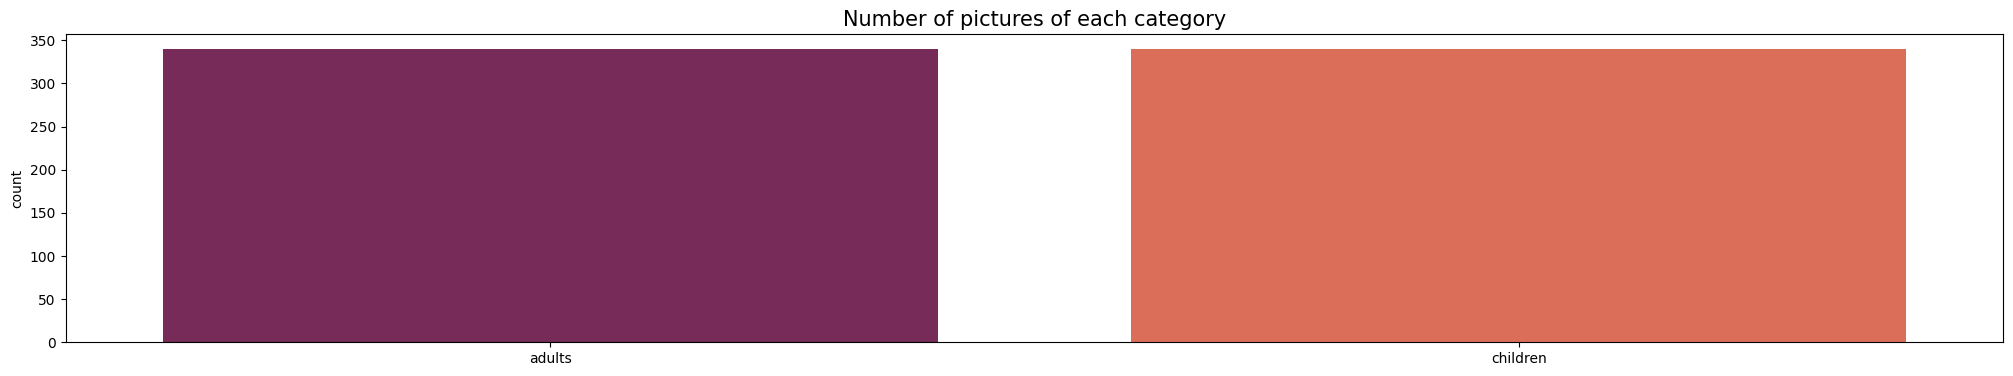

In [26]:
## Plotting count of images per each label in Train data

vc = df['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_32212\1592049469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")


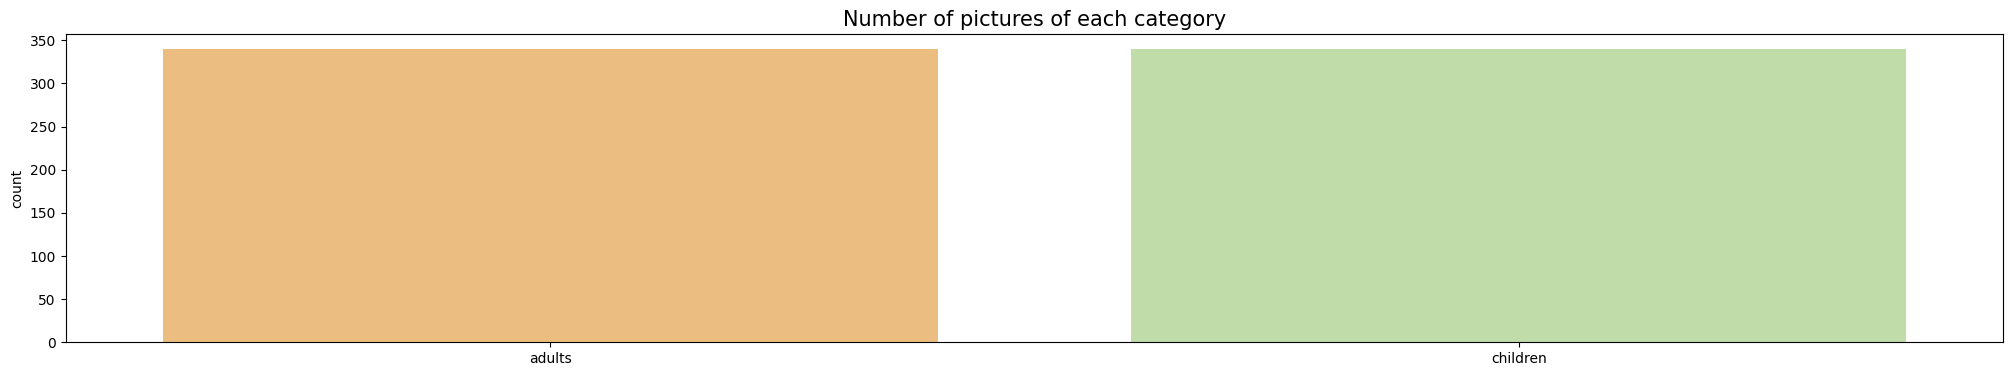

In [27]:
## Plotting count of images per each label on test data

vc1 = df1['Label'].value_counts()
plt.figure(figsize=(25,4))
sns.barplot(x = sorted(vc.index), y = vc,palette="Spectral")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

#### **Data Pre-Processing**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [29]:
imread(child).max()

255

In [30]:
'''Reshaping is done in cells'''

image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [31]:
image_gen.flow_from_directory(train_path)

Found 680 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 120 images belonging to 2 classes.


In [33]:
image_shape=(200,200,3)

#### **Defining Neural Network _(CNN)_**

In [34]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [35]:
'''Compiling Model'''

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [37]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

#### **Training and Fitting the Model**

In [38]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=16,class_mode='binary')

Found 680 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb', batch_size=16,class_mode='binary',shuffle=False)

Found 120 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'adults': 0, 'children': 1}

In [41]:
history=model.fit(train_image_gen,epochs=10,batch_size=64,validation_data=test_image_gen,validation_split=0.8)

Epoch 1/10


43/43 [==============================] - 31s 633ms/step - loss: 0.7956 - accuracy: 0.4721 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 2/10
43/43 [==============================] - 25s 585ms/step - loss: 0.6908 - accuracy: 0.5132 - val_loss: 0.6455 - val_accuracy: 0.5750
Epoch 3/10
43/43 [==============================] - 25s 576ms/step - loss: 0.6843 - accuracy: 0.5691 - val_loss: 0.6644 - val_accuracy: 0.6250
Epoch 4/10
43/43 [==============================] - 23s 536ms/step - loss: 0.6570 - accuracy: 0.6074 - val_loss: 0.6543 - val_accuracy: 0.6250
Epoch 5/10
43/43 [==============================] - 23s 538ms/step - loss: 0.6370 - accuracy: 0.6544 - val_loss: 0.6568 - val_accuracy: 0.5917
Epoch 6/10
43/43 [==============================] - 23s 533ms/step - loss: 0.6287 - accuracy: 0.6368 - val_loss: 0.6584 - val_accuracy: 0.5750
Epoch 7/10
43/43 [==============================] - 23s 531ms/step - loss: 0.5833 - accuracy: 0.6941 - val_loss: 0.6730 - val_accuracy: 0.62

In [42]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.795642,0.472059,0.693167,0.491667
1,0.690796,0.513235,0.645505,0.575000
2,0.684292,0.569118,0.664408,0.625000
3,0.656994,0.607353,0.654349,0.625000
4,0.637041,0.654412,0.656840,0.591667
5,0.628740,0.636765,0.658414,0.575000
6,0.583287,0.694118,0.672980,0.625000
7,0.517338,0.751471,0.757522,0.591667
8,0.473441,0.770588,0.738409,0.625000
9,0.411943,0.822059,0.739907,0.600000


#### **Accuracy and Loss**

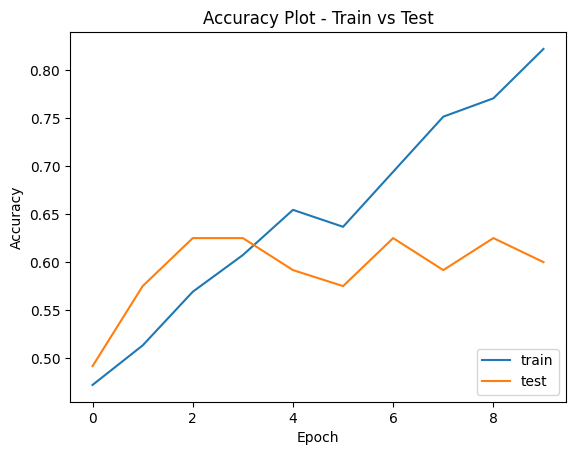

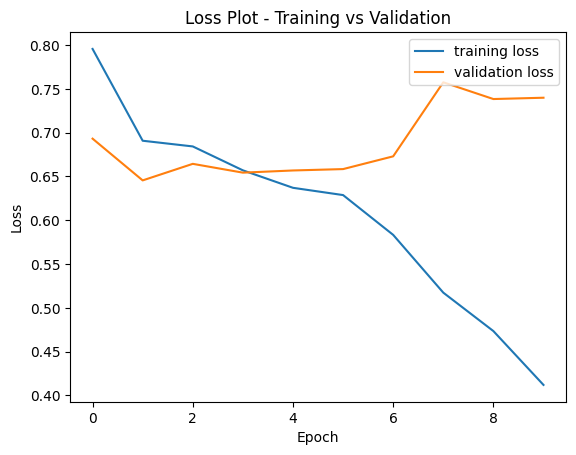

In [43]:
plt.plot(metrics['accuracy'])  # Plot training accuracy
plt.plot(metrics['val_accuracy'])  # Plot testing accuracy
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy Plot - Train vs Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plotting training and validation loss
plt.plot(metrics['loss'])  # Plots training loss
plt.plot(metrics['val_loss'])  # Plots validation loss
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.title('Loss Plot - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Axes: >

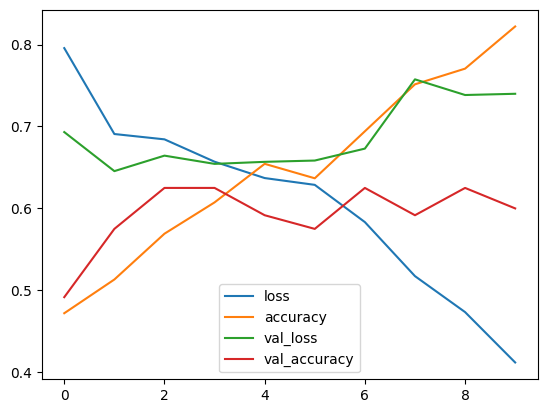

In [44]:
metrics.plot()

#### **Model Evaluation**

In [45]:
# Model Evaluation
evaluate_metrics = model.evaluate(test_image_gen,verbose=0)

# Print the evaluation results
print("Evaluation Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100))
print("Evaluation Loss = {:.6f}".format(evaluate_metrics[0]))

Evaluation Accuracy = 56.67%
Evaluation Loss = 0.809855


In [46]:
pred=model.predict(test_image_gen)
pred

8/8 [==============================] - 1s 150ms/step


array([[0.12533872],
       [0.5817497 ],
       [0.2066654 ],
       [0.69259846],
       [0.16043963],
       [0.802821  ],
       [0.7027511 ],
       [0.45550853],
       [0.5643023 ],
       [0.17898685],
       [0.87736607],
       [0.04085794],
       [0.56617045],
       [0.83066416],
       [0.254162  ],
       [0.50424904],
       [0.09309922],
       [0.00300093],
       [0.6218993 ],
       [0.0507932 ],
       [0.46619117],
       [0.05470508],
       [0.19322725],
       [0.53312516],
       [0.26222494],
       [0.56440705],
       [0.28010646],
       [0.42830324],
       [0.23149827],
       [0.81079406],
       [0.01781039],
       [0.3082213 ],
       [0.54818946],
       [0.00928024],
       [0.25344247],
       [0.07029434],
       [0.40308118],
       [0.5952847 ],
       [0.9974733 ],
       [0.18381505],
       [0.19880788],
       [0.4055133 ],
       [0.2255041 ],
       [0.57781565],
       [0.53794   ],
       [0.01070673],
       [0.10734933],
       [0.050

In [50]:
predictions=pred>0.5

In [47]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60        60
           1       0.59      0.55      0.57        60

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120



<Axes: >

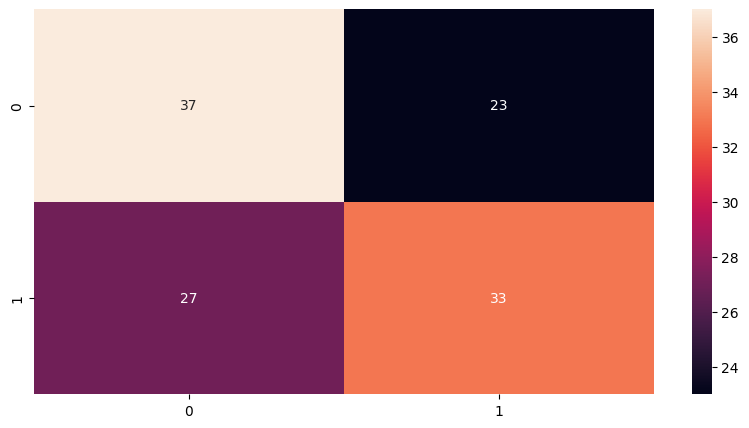

In [53]:
results=confusion_matrix(test_image_gen.classes,predictions)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(results,annot=True)

1/1 [==============================] - 0s 35ms/step
 This image most likely belongs to children
With an accuracy of 56.67%


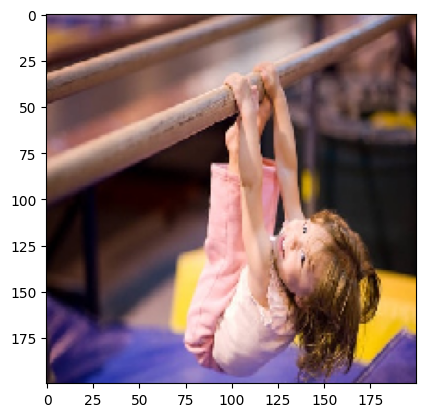

In [58]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

image_path = test_path+'children\\'+'2.jpg'

img = load_img(image_path, target_size=(200, 200))  
x = img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0) 
plt.imshow(img)

classes = model.predict(x)
predicted_class = np.argmax(classes)

class_name = train_image_gen.class_indices
class_name_inverted = {y: x for x, y in class_name.items()}

if classes[0]>0.5:
    print(f"This image most likely belongs to {class_name_inverted[0]}")
    print("With an accuracy of {:.2f}%".format(evaluate_metrics[1] * 100))
else:
    print(f" This image most likely belongs to {class_name_inverted[1]}")
    print("With an accuracy of {:.2f}%".format(evaluate_metrics[1] * 100))

1/1 [==============================] - 0s 26ms/step
 This image most likely belongs to adults
With an accuracy of 56.67%


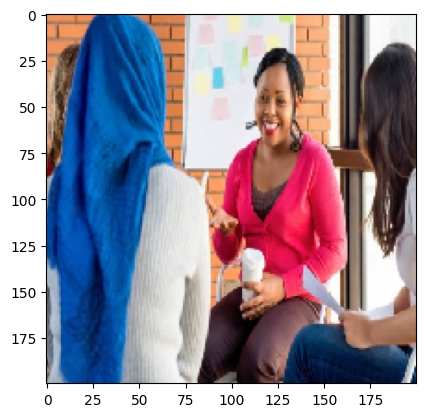

In [55]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

image_path = test_path+'adults\\'+'59.jpg'

img = load_img(image_path, target_size=(200, 200))  # Resize if necessary
x = img_to_array(img)
x = x / 255.0  # Normalize if needed
x = np.expand_dims(x, axis=0)  # Add batch dimension
plt.imshow(img)

# Make prediction (assuming your model outputs a binary classification)
classes = model.predict(x)
predicted_class = np.argmax(classes)

class_name = train_image_gen.class_indices
class_name_inverted = {y: x for x, y in class_name.items()}

if classes[0]>0.5:
    print(f" This image most likely belongs to {class_name_inverted[0]}")
    print("With an accuracy of {:.2f}%".format(evaluate_metrics[1] * 100))
else:
    print(f" This image most likely belongs to {class_name_inverted[1]}")
    print("With an accuracy of {:.2f}%".format(evaluate_metrics[1] * 100))

In [57]:
## SAVE THE MODEL 

from keras.models import load_model
model.save('Child-Detector.h5')